<a href="https://colab.research.google.com/github/Fulmo/ML_ITMM/blob/master/lab1_imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 1**
# **Data Mining and Preprocessing**


---


Link to the dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [0]:
import seaborn as sns

from pandas import read_csv
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# [1] Data Load & Overview

In [8]:
imdb = read_csv(r'/content/drive/My Drive/ITMM/ML_ Zolotykh/lab1/tmdb_5000_movies.csv')
imdb = imdb.dropna(how='all')
imdb

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [9]:
imdb.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Посмотрим, данные какого типа содержит в себе наш датасет

In [10]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

Выведем базовою статистику:

In [11]:
imdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Отсюда видно, что число оценок, и средняя оценка представляют наиболее важные признаки данных

## Movie Ratings Sub-data

Для наглядности возьмем подвыборку наших данных и посмотрим какие фильмы с наиболее высокой оценкой

In [12]:
movie_ratings = imdb[['original_title','vote_average', 'vote_count']]
movie_ratings = movie_ratings.sort_values(['vote_average', 'vote_count'], ascending=[False, False])
movie_ratings.head(10)

,original_title,vote_average,vote_count
4247,Me You and Five Bucks,10.0,2
3519,Stiff Upper Lips,10.0,1
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
1881,The Shawshank Redemption,8.5,8205
2970,There Goes My Baby,8.5,2
3337,The Godfather,8.4,5893
2796,The Prisoner of Zenda,8.4,11


Здесь заметно, что не достаточно ограничить подвыборку только по высоким оценкам(фильмы с самой высокой оценкой, имеют малое число голосов), нужно так же учесть взаимосвязть величин - выведем самые высокие оценки при наибольшем числе голосов

In [13]:
most_voted=movie_ratings[movie_ratings.vote_count >=1000]
most_voted.head(10)

,original_title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
662,Fight Club,8.3,9413
3232,Pulp Fiction,8.3,8428
1818,Schindler's List,8.3,4329
3865,Whiplash,8.3,4254
2294,千と千尋の神隠し,8.3,3840
2731,The Godfather: Part II,8.3,3338
65,The Dark Knight,8.2,12002
809,Forrest Gump,8.2,7927


In [14]:
most_voted.describe()

,vote_average,vote_count
count,924.000000,924.000000
mean,6.767100,2566.481602
std,0.745575,1813.289977
min,4.100000,1000.000000
25%,6.200000,1345.750000
50%,6.700000,1914.500000
75%,7.300000,3095.250000
max,8.500000,13752.000000


Отсюда уже видно, что эти признаки имеют максимальную взаимосвязь

# [2] Formatting&Clean Data

*   This preprocessing is good to do corr analasys and remove zero numeric values. 
*  Also according to most_voted movies subdata 



Для того, чтобы исследовать наши данные, избавимся от выбросов, подготовим данные для обучения алгоритмов МО, а так же преобразуем часть признаков в более доступный для обучения формат

In [15]:
imdb = imdb[imdb['budget']!=0]
imdb = imdb[imdb['vote_average']!=0.]
imdb = imdb[imdb['revenue']!=0]
imdb.shape

(3227, 20)

Выше видно - размер данных, без нулевых значений для части основных признаков


In [16]:
imdb = imdb[imdb['budget']>= 1000]
imdb = imdb[imdb.vote_count >=100]
imdb.shape

(2710, 20)

Размер данных, у которых среднее число оценок больше ста и бюджет фильмов более 1000 (пытаемся отбросить наименнее важные данные - считая их потенциально выбросами). Сразу видно, насколько скращается размерность, оставляя наиболее "полные"

See distribution to check budget

Для этого посмотрим на распределение значений, построив для примера гистограмму

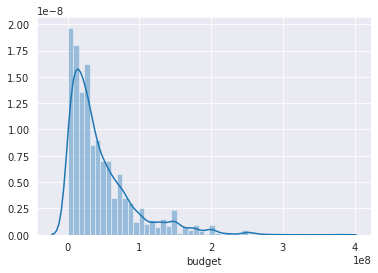

In [17]:
sns.set_style('darkgrid')
sns.distplot(imdb.budget)

## Add Year Column

Хотелось бы преобразовать дату релиза фильма, в более удобный для классификации вариант: DD-MM-YY -> YYYY 

И мы сразу можем работатьь с новыми значениями, например посмотреть гистограмму значений по годам

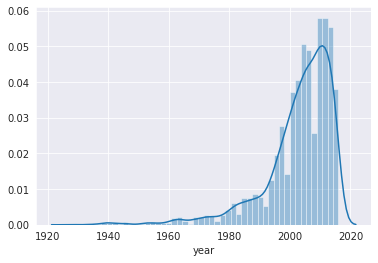

In [18]:
from pandas import to_datetime
imdb.release_date = to_datetime(imdb.release_date)
imdb['year'] = imdb.release_date.dt.year
# use a visualisation to see what portion of movies are older that 20 years
sns.set_style('darkgrid')
sns.distplot(imdb['year'])

Сколько всего годов выпуска мы имеем в нашей базе фильмов

In [19]:
imdb.year.unique()

array([2009, 2007, 2015, 2012, 2010, 2016, 2006, 2008, 2013, 2011, 2014,
       2005, 1997, 2004, 1999, 1995, 2003, 2001, 2002, 1998, 2000, 1990,
       1991, 1994, 1996, 1982, 1993, 1992, 1989, 1984, 1988, 1978, 1962,
       1980, 1985, 1940, 1963, 1987, 1973, 1983, 1979, 1986, 1981, 1977,
       1976, 1970, 1971, 1960, 1964, 1927, 1974, 1975, 1965, 1968, 1967,
       1969, 1972, 1961, 1954, 1939, 1946, 1958, 1957, 1966, 1959, 1952,
       1951, 1953, 1945, 1937, 1955, 1942, 1934])

Статистика поменялась, благодаря форматированию одного из признаков

In [20]:
imdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
count,2.710000e+03,2710.000000,2710.000000,2.710000e+03,2710.000000,2710.000000,2710.000000,2710.000000
mean,4.568932e+07,46138.412915,33.741242,1.420835e+08,111.134686,6.375683,1154.821771,2002.878598
std,4.629663e+07,77402.237162,37.669642,1.964813e+08,20.191770,0.828058,1478.824699,11.726473
min,7.000000e+03,5.000000,1.041254,1.200000e+01,63.000000,3.000000,100.000000,1927.000000
25%,1.400000e+07,2988.000000,14.972834,3.000000e+07,97.000000,5.800000,297.000000,1999.000000
50%,3.000000e+07,10585.500000,24.880727,7.570797e+07,107.000000,6.400000,610.500000,2006.000000
75%,6.000000e+07,49025.000000,41.497234,1.699892e+08,122.000000,7.000000,1367.250000,2011.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,248.000000,8.500000,13752.000000,2016.000000


## Format dict-like objects
Parse the stringified features into their corresponding python objects

Преобразуем объекты вида "словарь", изъяв оттуда наиболее доступные для изучения данные, и сделаем их доп. признаками, доступными для применения алгоритмов.

Например мы получим название жанра для фильма, названии компании занимавщейся ее созданием, старну, а так же язык оригинала.

Эти метки мы сможем использовать активно далее и применять любые способы, для расчета статистических величин

In [21]:
from ast import literal_eval

features = [ 'keywords', 'genres','production_companies','production_countries','spoken_languages']
for feature in features:
    imdb[feature] = imdb[feature].apply(literal_eval)
    
# Returns the top element.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        names =' '.join(names[:1])
    return names

for feature in features:
    imdb[feature] = imdb[feature].apply(get_list)
    
imdb[['title','keywords', 'genres','production_companies','production_countries','spoken_languages']].sample(5)



,title,keywords,genres,production_companies,production_countries,spoken_languages
4518,The Station Agent,train station,Drama,Next Wednesday Productions,United States of America,English
2094,Jaws 2,mayor,Horror,Universal Pictures,United States of America,English
1559,The Notebook,poem,Romance,New Line Cinema,United States of America,English
3774,Red State,christianity,Horror,The Harvey Boys,United States of America,English
3589,Still Alice,mother,Drama,Killer Films,United States of America,English


Посмотрим на итог наших преобразований. Теперь мы имеем набор признаков, с каждым из которых можно работать

In [22]:
imdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,ocean,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,spy,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,United Kingdom,2015-10-26,880674609,148.0,Français,Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,Action,http://www.thedarkknightrises.com/,49026,dc comics,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,Action,http://movies.disney.com/john-carter,49529,based on novel,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012


# [3] Covariance & Correlation

Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия.  

Поэтому для наших многомерных данных будем использовать подобную статистику

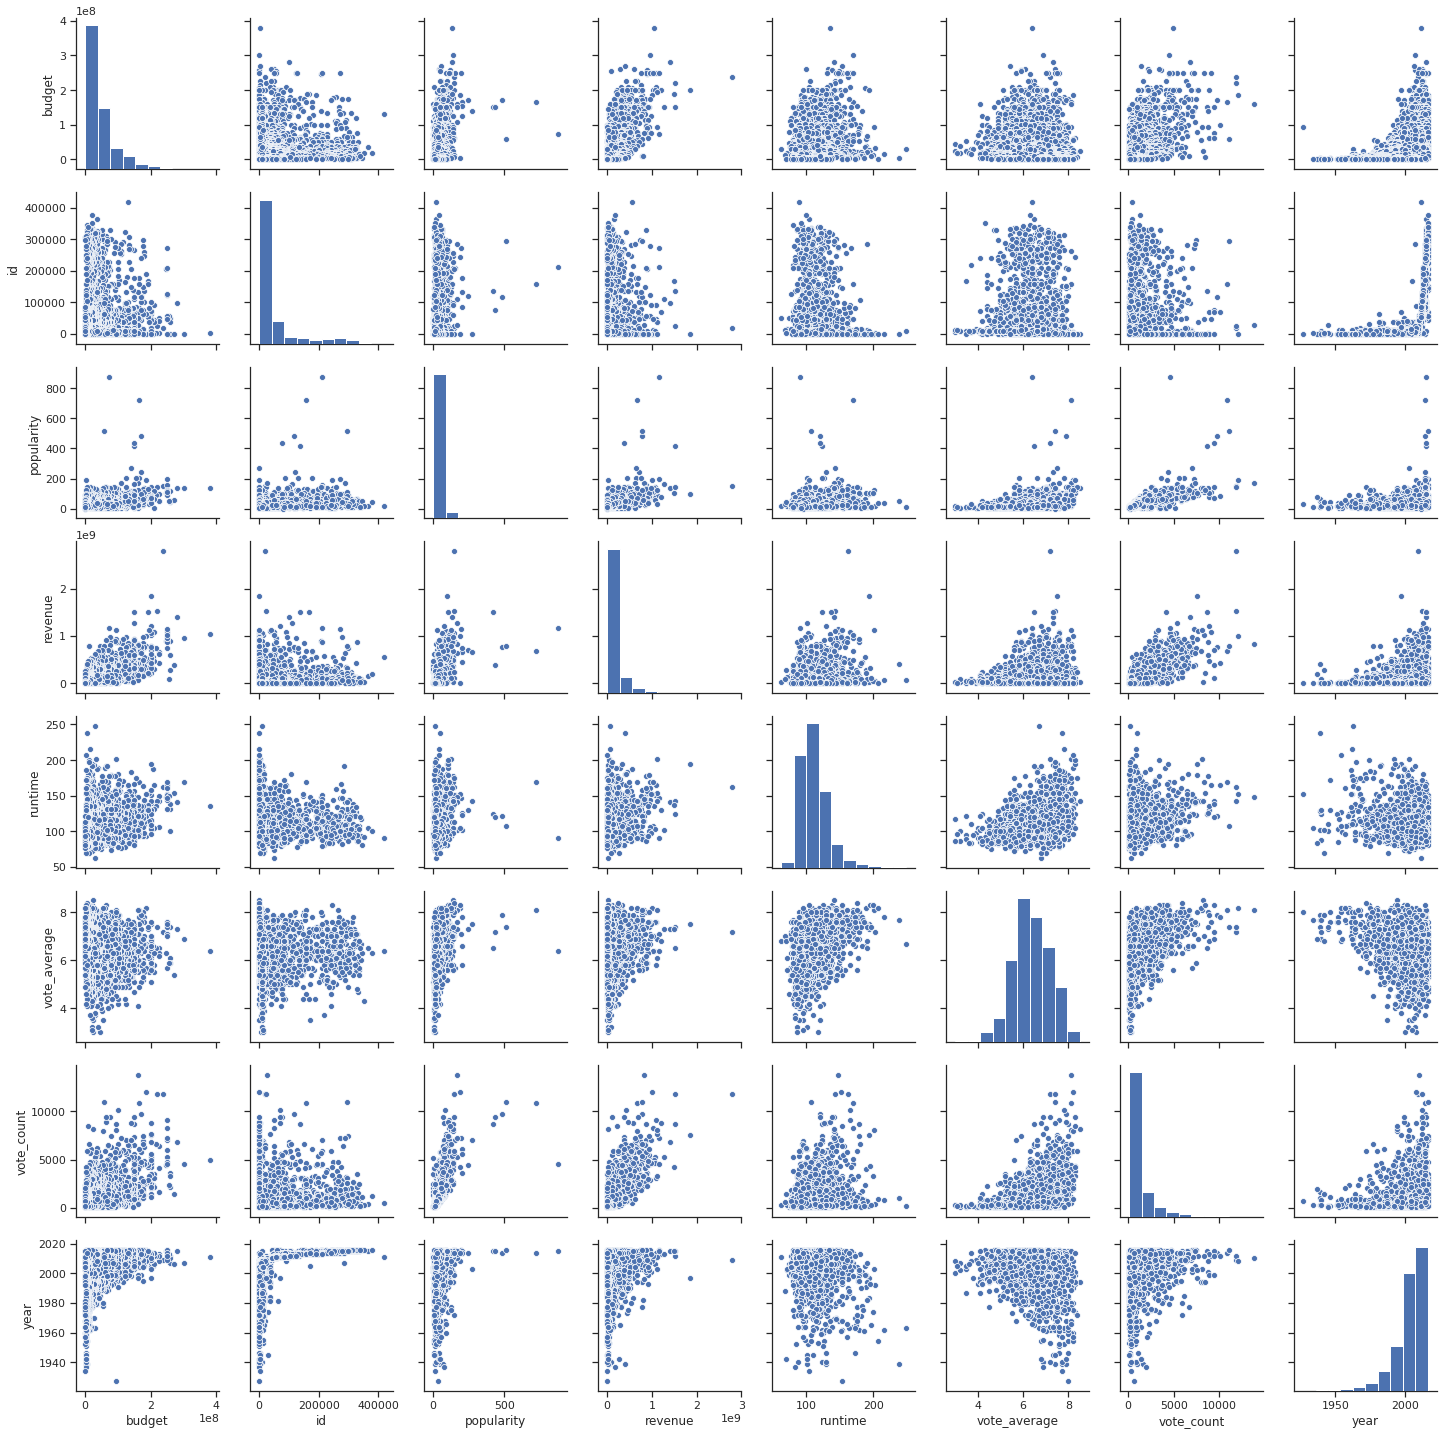

In [23]:
sns.set(style='ticks')
sns.pairplot(imdb)

In [24]:
imdb.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
budget,1.000000,0.006407,0.388436,0.690790,0.252030,-0.072994,0.508859,0.256029
id,0.006407,1.000000,0.183492,0.020353,-0.040757,-0.052246,0.104822,0.480907
popularity,0.388436,0.183492,1.000000,0.570574,0.200384,0.282674,0.725897,0.128476
revenue,0.690790,0.020353,0.570574,1.000000,0.257510,0.170767,0.737814,0.121013
runtime,0.252030,-0.040757,0.200384,0.257510,1.000000,0.411508,0.289790,-0.163975
vote_average,-0.072994,-0.052246,0.282674,0.170767,0.411508,1.000000,0.393107,-0.249303
vote_count,0.508859,0.104822,0.725897,0.737814,0.289790,0.393107,1.000000,0.147773
year,0.256029,0.480907,0.128476,0.121013,-0.163975,-0.249303,0.147773,1.000000


Построим матрицу сопряженности для каждого из двух наших признаков.

Обобщение дисперсии на высшие размерности — ковариационная матрица, и эти два понятия эквивалентны. При проекции на вектор максимизируется дисперсия проекции, при проекции на пространства больших порядков – вся ее ковариационная матрица.

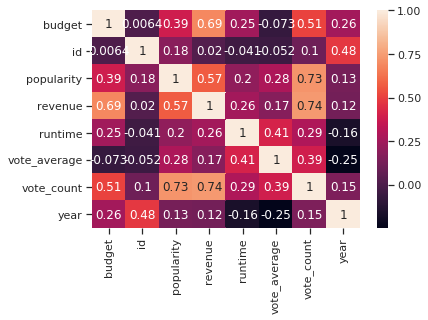

In [25]:
sns.heatmap(imdb.corr(), annot=True)
plt.show()

Между двумя ранее рассмотреными признаками (оценка, число голосов) существует прямопропорциональна взаимосвязь

In [26]:
most_voted.corr()

,vote_average,vote_count
vote_average,1.000000,0.370931
vote_count,0.370931,1.000000


In [27]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710 entries, 0 to 4798
Data columns (total 21 columns):
budget                  2710 non-null int64
genres                  2710 non-null object
homepage                1221 non-null object
id                      2710 non-null int64
keywords                2710 non-null object
original_language       2710 non-null object
original_title          2710 non-null object
overview                2710 non-null object
popularity              2710 non-null float64
production_companies    2710 non-null object
production_countries    2710 non-null object
release_date            2710 non-null datetime64[ns]
revenue                 2710 non-null int64
runtime                 2710 non-null float64
spoken_languages        2710 non-null object
status                  2710 non-null object
tagline                 2586 non-null object
title                   2710 non-null object
vote_average            2710 non-null float64
vote_count              2710 n

## Correlation Budget And Revenue

Сделаем наглядной так же корреляцию между другими признаками

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


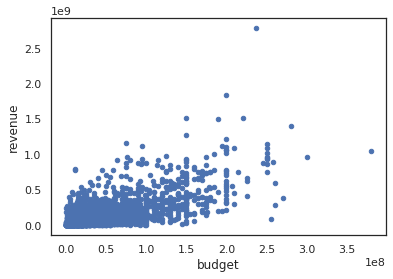

In [28]:
sns.set(style="white", color_codes=True)
imdb.plot(kind='scatter', x='budget', y='revenue')

### Including Genres info

Посмотрим так же еще одну интересную статистику -  какие жанры фильмов имеют какой размер бюджета.

Это мы сможем оценить, благодаря тому, что получили инофрмацию о жанре ранее, после преобразования

In [29]:
imdb.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Music',
       'Documentary'], dtype=object)

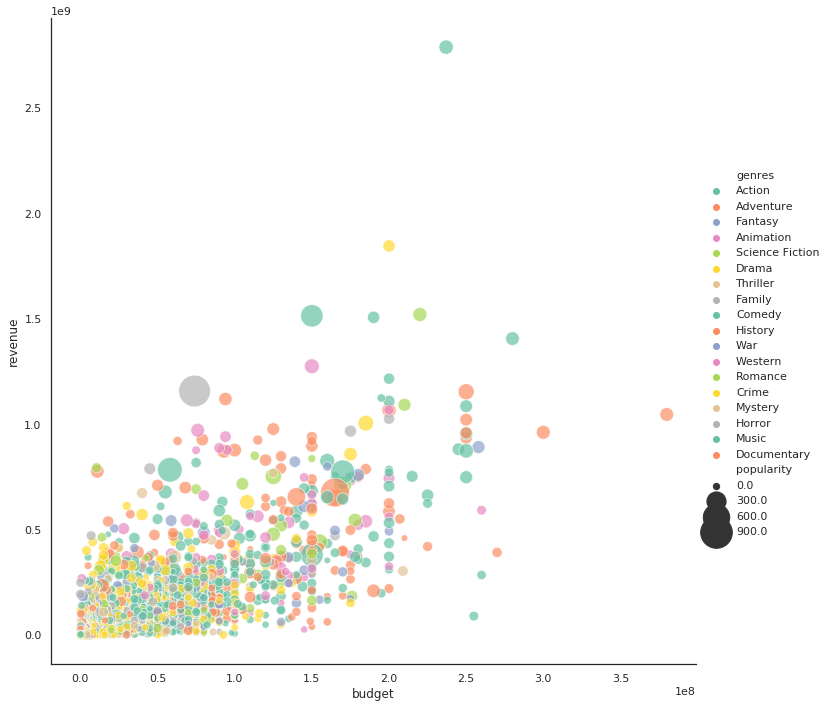

In [30]:
sns.relplot(x="budget", y="revenue", data= imdb, size ="popularity", hue = 'genres', palette = 'Set2',alpha=.7,sizes=(40,1000),height=10)

## Correlation Between Budget And Ratings

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


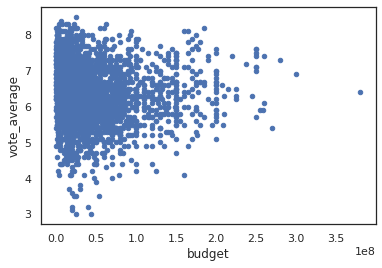

In [31]:
sns.set(style="white", color_codes=True)
imdb.plot(kind='scatter', x='budget', y='vote_average')

### Including Popularity info

Здесь видно, что из современных фильмов (>=2010) наибольшую популярность, а так же оценку набирали фильмы со средним или малым бюджетом (<=2.0)

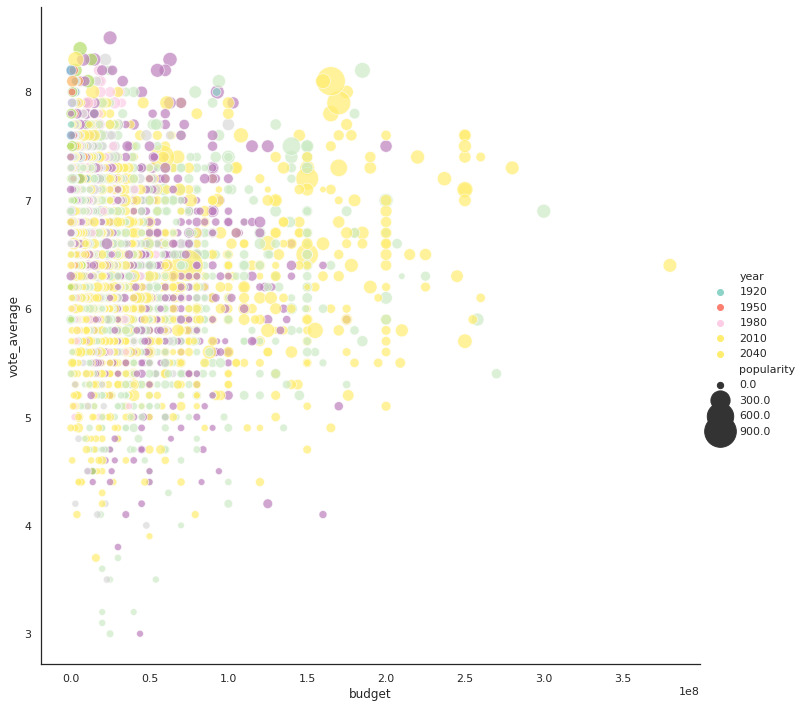

In [32]:
sns.relplot(x="budget", y="vote_average", data= imdb, size ="popularity", hue = 'year', palette = 'Set3',alpha=.7,sizes=(40,1000),height=10)

## Correlation Between Revenue And Ratings

Рассмотрим зависимость рейтинга и сборов.

Получаем, что наибольшую плотность всех оценок представляют фильмы со значением кассовых сборов менее 1.5 (то есть это большнство фильмов)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


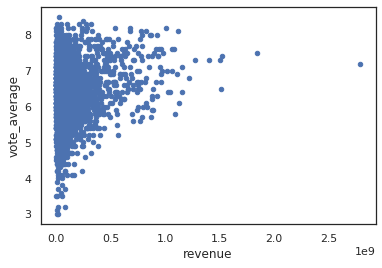

In [33]:
imdb.plot(kind='scatter', x='revenue', y='vote_average')

### Including Vote Counts info

Что если учесть здесь не только рейтинг, но и так же число оценок?

тогда результат несколько меняется, и мы видм, что наиболее высокие оценки у фильмов с наибольшей популярностью, но при этом кассовыми сборами ниже среднего. (Что весьма не очевидно)

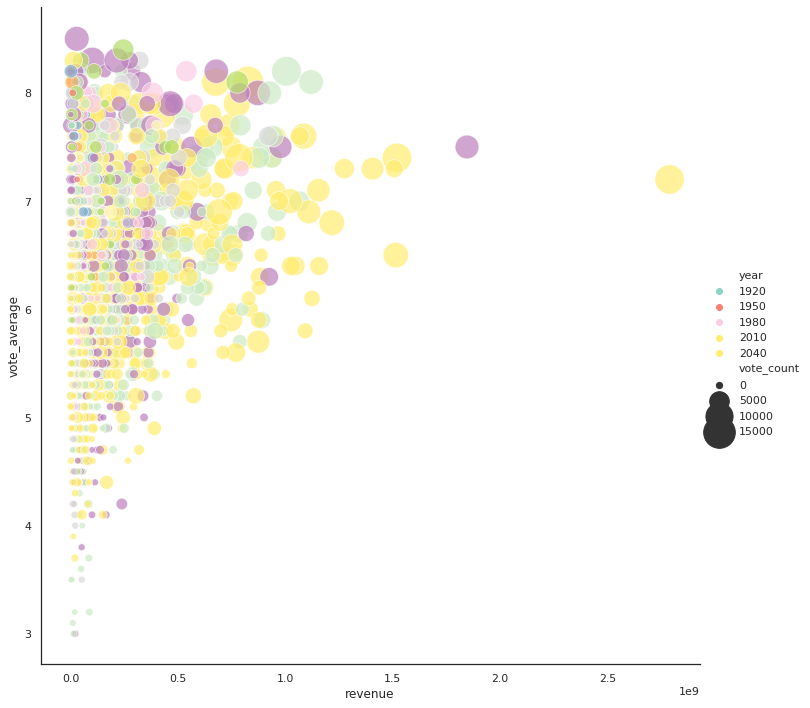

In [34]:
sns.relplot(x="revenue", y="vote_average", data= imdb, size ="vote_count", hue = 'year', palette = 'Set3',alpha=.7,sizes=(40,1000),height=10)

In [35]:
imdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'ko', 'te', 'cn', 'es', 'nl', 'ru', 'de',
       'th', 'xx', 'it', 'da', 'nb', 'pt', 'pl', 'he', 'hi', 'id', 'ro',
       'no', 'fa'], dtype=object)

Здесь визуализируем распределение оценок, относительно бюджета для английского (как наиболее популярного) и други языков 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  del sys.path[0]


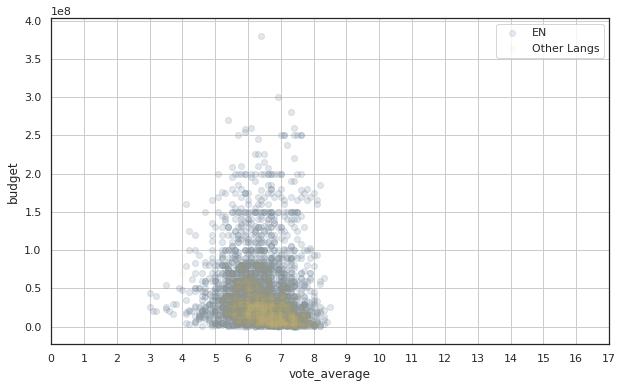

In [36]:
plt.figure(figsize = (10, 6))

plt.scatter(imdb[imdb['original_language'] == 'en']['vote_average'],
            imdb[imdb['original_language'] == 'en']['budget'],
            alpha = 0.15,
            label = 'EN',
            color = 'b')

plt.scatter(imdb[imdb['original_language']!='EN']['vote_average'],
            imdb[imdb['original_language']!='EN']['budget'],
            alpha = 0.05,
            label = 'Other Langs',
            color = 'Y')

plt.xlabel('vote_average')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('budget')
plt.legend()
plt.grid()



In [37]:
imdb.describe(include = ['object'])

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,spoken_languages,status,tagline,title
count,2710,1221,2710,2710,2710,2710,2710,2710,2710,2710,2586,2710
unique,18,1201,944,24,2710,2710,597,44,42,1,2579,2709
top,Drama,http://www.missionimpossible.com/,based on novel,en,Anchorman: The Legend of Ron Burgundy,"A small, seemingly innocuous plastic reel of f...",Paramount Pictures,United States of America,English,Released,What could go wrong?,The Host
freq,567,4,71,2619,1,1,209,1877,2388,2710,2,2


In [38]:
imdb.describe(include = 'all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
count,2.710000e+03,2710,1221,2710.000000,2710,2710,2710,2710,2710.000000,2710,2710,2710,2.710000e+03,2710.000000,2710,2710,2586,2710,2710.000000,2710.000000,2710.000000
unique,NaN,18,1201,NaN,944,24,2710,2710,NaN,597,44,2163,NaN,NaN,42,1,2579,2709,NaN,NaN,NaN
top,NaN,Drama,http://www.missionimpossible.com/,NaN,based on novel,en,Anchorman: The Legend of Ron Burgundy,"A small, seemingly innocuous plastic reel of f...",NaN,Paramount Pictures,United States of America,2014-12-25 00:00:00,NaN,NaN,English,Released,What could go wrong?,The Host,NaN,NaN,NaN
freq,NaN,567,4,NaN,71,2619,1,1,NaN,209,1877,7,NaN,NaN,2388,2710,2,2,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.568932e+07,NaN,NaN,46138.412915,NaN,NaN,NaN,NaN,33.741242,NaN,NaN,NaN,1.420835e+08,111.134686,NaN,NaN,NaN,NaN,6.375683,1154.821771,2002.878598
std,4.629663e+07,NaN,NaN,77402.237162,NaN,NaN,NaN,NaN,37.669642,NaN,NaN,NaN,1.964813e+08,20.191770,NaN,NaN,NaN,NaN,0.828058,1478.824699,11.726473
min,7.000000e+03,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.041254,NaN,NaN,NaN,1.200000e+01,63.000000,NaN,NaN,NaN,NaN,3.000000,100.000000,1927.000000
25%,1.400000e+07,NaN,NaN,2988.000000,NaN,NaN,NaN,NaN,14.972834,NaN,NaN,NaN,3.000000e+07,97.000000,NaN,NaN,NaN,NaN,5.800000,297.000000,1999.000000


# [4] Improved Data Cleaning&Preparing
Clean data for further algorithms training

Избавимся от выбросов и подготовим наши данные для обучения алгоритмов МО

Очистим датасет от незаполненых ячеек:

In [0]:
# not needed info
imdb = imdb.drop('homepage', axis = 1)\
            .drop('id', axis = 1)\
            .drop('keywords',    axis = 1)\
            .drop('overview', axis = 1)\
            .drop('tagline', axis = 1)\
            .drop('release_date', axis=1)

In [40]:
imdb.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'year'],
      dtype='object')

In [41]:
imdb.status.unique()

array(['Released'], dtype=object)

In [42]:
imdb = imdb.drop(['status','original_title'], axis = 1)
imdb.columns

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count', 'year'],
      dtype='object')

In [43]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710 entries, 0 to 4798
Data columns (total 13 columns):
budget                  2710 non-null int64
genres                  2710 non-null object
original_language       2710 non-null object
popularity              2710 non-null float64
production_companies    2710 non-null object
production_countries    2710 non-null object
revenue                 2710 non-null int64
runtime                 2710 non-null float64
spoken_languages        2710 non-null object
title                   2710 non-null object
vote_average            2710 non-null float64
vote_count              2710 non-null int64
year                    2710 non-null int64
dtypes: float64(3), int64(4), object(6)
memory usage: 376.4+ KB


Разделим на категориальные и числовые признаки

In [44]:
categorical_columns = [c for c in imdb.columns if imdb[c].dtype.name == 'object']
numerical_columns   = [c for c in imdb.columns if imdb[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['genres', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'title']
['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'year']


## Fill Empty/NaN Values

In [45]:
imdb.median(axis=0)

budget          3.000000e+07
popularity      2.488073e+01
revenue         7.570797e+07
runtime         1.070000e+02
vote_average    6.400000e+00
vote_count      6.105000e+02
year            2.006000e+03
dtype: float64

In [0]:
imdb = imdb.fillna(imdb.median(axis = 0), axis = 0)

### Check corectness and missing values

In [47]:
imdb[numerical_columns].count(axis = 0)

budget          2710
popularity      2710
revenue         2710
runtime         2710
vote_average    2710
vote_count      2710
year            2710
dtype: int64

In [48]:
imdb[categorical_columns].count(axis = 0)

genres                  2710
original_language       2710
production_companies    2710
production_countries    2710
spoken_languages        2710
title                   2710
dtype: int64

In [0]:
# direct method
from pandas import DataFrame
miss_values: DataFrame = imdb.isna()

for val in miss_values.values:
  if val is True:
    print(val)

In [50]:
imdb.describe(include = [object])

,genres,original_language,production_companies,production_countries,spoken_languages,title
count,2710,2710,2710,2710,2710,2710
unique,18,24,597,44,42,2709
top,Drama,en,Paramount Pictures,United States of America,English,The Host
freq,567,2619,209,1877,2388,2


## Standartization

### Numerical Features

In [51]:
imdb[numerical_columns].head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,year
0,237000000,150.437577,2787965087,162.0,7.2,11800,2009
1,300000000,139.082615,961000000,169.0,6.9,4500,2007
2,245000000,107.376788,880674609,148.0,6.3,4466,2015
3,250000000,112.312950,1084939099,165.0,7.6,9106,2012
4,260000000,43.926995,284139100,132.0,6.1,2124,2012
5,258000000,115.699814,890871626,139.0,5.9,3576,2007
6,260000000,48.681969,591794936,100.0,7.4,3330,2010
7,280000000,134.279229,1405403694,141.0,7.3,6767,2015
8,250000000,98.885637,933959197,153.0,7.4,5293,2009
9,250000000,155.790452,873260194,151.0,5.7,7004,2016


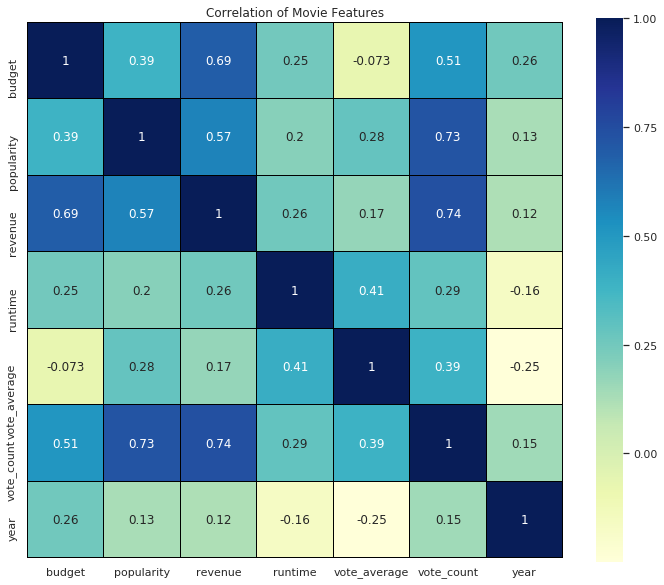

In [52]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Correlation of Movie Features')
sns.heatmap(imdb[numerical_columns].astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [53]:
imdb[numerical_columns].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year
count,2.710000e+03,2710.000000,2.710000e+03,2710.000000,2710.000000,2710.000000,2710.000000
mean,4.568932e+07,33.741242,1.420835e+08,111.134686,6.375683,1154.821771,2002.878598
std,4.629663e+07,37.669642,1.964813e+08,20.191770,0.828058,1478.824699,11.726473
min,7.000000e+03,1.041254,1.200000e+01,63.000000,3.000000,100.000000,1927.000000
25%,1.400000e+07,14.972834,3.000000e+07,97.000000,5.800000,297.000000,1999.000000
50%,3.000000e+07,24.880727,7.570797e+07,107.000000,6.400000,610.500000,2006.000000
75%,6.000000e+07,41.497234,1.699892e+08,122.000000,7.000000,1367.250000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,248.000000,8.500000,13752.000000,2016.000000


In [0]:
# save cleared data
imdb.to_pickle('/content/drive/My Drive/ITMM/ML_ Zolotykh/lab1/cleared_imdb.pkl')

# [5] Preparing Train and Test data

### Categorical Features (Make classes)

In [55]:
# load preprocessed data
from pandas import read_pickle
imdb = read_pickle('/content/drive/My Drive/ITMM/ML_ Zolotykh/lab1/cleared_imdb.pkl')

categorical_columns = [c for c in imdb.columns if imdb[c].dtype.name == 'object']
numerical_columns   = [c for c in imdb.columns if imdb[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['genres', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'title']
['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'year']


Разделим наши данные на 10 классов, разметив кажую из записей метками 0-10, каждая из которых будет означать среднее целое рейтинга

In [0]:
from pandas import cut
imdb['rating_classes'] = cut(imdb['vote_average'], 10, labels=["1", "2","3","4","5","6","7","8","9","10"]) 

In [0]:
imdb['revenue_classes'] = cut(imdb['revenue'],10)

In [58]:
imdb.head(10)

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,rating_classes,revenue_classes
0,237000000,Action,en,150.437577,Ingenious Film Partners,United States of America,2787965087,162.0,English,Avatar,7.2,11800,2009,8,"(2509168579.5, 2787965087.0]"
1,300000000,Adventure,en,139.082615,Walt Disney Pictures,United States of America,961000000,169.0,English,Pirates of the Caribbean: At World's End,6.9,4500,2007,8,"(836389534.5, 1115186042.0]"
2,245000000,Action,en,107.376788,Columbia Pictures,United Kingdom,880674609,148.0,Français,Spectre,6.3,4466,2015,6,"(836389534.5, 1115186042.0]"
3,250000000,Action,en,112.312950,Legendary Pictures,United States of America,1084939099,165.0,English,The Dark Knight Rises,7.6,9106,2012,9,"(836389534.5, 1115186042.0]"
4,260000000,Action,en,43.926995,Walt Disney Pictures,United States of America,284139100,132.0,English,John Carter,6.1,2124,2012,6,"(278796519.5, 557593027.0]"
5,258000000,Fantasy,en,115.699814,Columbia Pictures,United States of America,890871626,139.0,English,Spider-Man 3,5.9,3576,2007,6,"(836389534.5, 1115186042.0]"
6,260000000,Animation,en,48.681969,Walt Disney Pictures,United States of America,591794936,100.0,English,Tangled,7.4,3330,2010,8,"(557593027.0, 836389534.5]"
7,280000000,Action,en,134.279229,Marvel Studios,United States of America,1405403694,141.0,English,Avengers: Age of Ultron,7.3,6767,2015,8,"(1393982549.5, 1672779057.0]"
8,250000000,Adventure,en,98.885637,Warner Bros.,United Kingdom,933959197,153.0,English,Harry Potter and the Half-Blood Prince,7.4,5293,2009,8,"(836389534.5, 1115186042.0]"
9,250000000,Action,en,155.790452,DC Comics,United States of America,873260194,151.0,English,Batman v Superman: Dawn of Justice,5.7,7004,2016,5,"(836389534.5, 1115186042.0]"


## Splitting train and test data

Разобюем данные на обучающую и тестовые выборки

In [59]:
X_rating = imdb[numerical_columns]
Y_rating = imdb['rating_classes']
print(X_rating.shape)
print(Y_rating.shape)

(2710, 7)
(2710,)


In [0]:
from sklearn.preprocessing import StandardScaler
X_rating = StandardScaler().fit_transform(X_rating)

In [61]:
X_rating

array([[ 4.13304383,  3.09845981, 13.46881559, ...,  0.99566627,
         7.19973289,  0.52211196],
       [ 5.49408523,  2.79696882,  4.16868066, ...,  0.63330597,
         2.26246937,  0.35152622],
       [ 4.30587448,  1.95513235,  3.75978562, ..., -0.09141463,
         2.2394739 ,  1.03386918],
       ...,
       [-0.98680508, -0.77497377, -0.69273071, ..., -0.2122014 ,
        -0.70665211, -2.63372423],
       [-0.9869131 , -0.27701931, -0.72111137, ...,  0.63330597,
        -0.33601918,  0.09564761],
       [-0.98231148, -0.51699571, -0.71288434, ...,  0.27094567,
        -0.62008092, -0.92786683]])

In [62]:
len(X_rating)

2710

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_rating, Y_rating, test_size = 0.1, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2439 271


---


# **PART 2**
# **Machine Learning Models**


---

# [6] Supervised Learning

Приведем краткий обзор алгоритмов МО с учителем, подходящих дя дальшейшей классификации на основе наших данных

## K-NN

* Это один из самых простых алгоритмов классификации


Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

* Вычислить расстояние до каждого из объектов обучающей выборки
* Отобрать k объектов обучающей выборки, расстояние до которых минимально
* Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей


In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_rating, Y_rating)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [65]:
import numpy as np
y_train_predict = knn.predict(X_rating)
y_test_predict = knn.predict(X_test)

err_train = np.mean(Y_rating != y_train_predict)
err_test  = np.mean(Y_test  != y_test_predict)

print(err_train, err_test)

0.17269372693726937 0.19557195571955718


Ошибка на наших тестовых данных составляет 19%, но можно ли лучше?

#### HyperParameters Selection

Для этого воспользуемся перебором гиперпараметров (настроек модели), и выберем наилучши результат обучения

In [66]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.23042230422304222 5


In [67]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

0.14555145551455514 0.23985239852398524


Мы получили ошибку на тренировочных данных меньше, а на тестовых больше. Это свидетельствует о том, что возможно переобучение, поскольку алгоритм недетерменированный, а набор данных невелик, то не всегда в таких простых алгоритмах мы сможем подобрать оптималбное значение параметров

## SVC

Основной задачей алгоритма является найти наиболее правильную линию, или гиперплоскость разделяющую данные на два класса. SVM это алгоритм, который получает на входе данные, и возвращает такую разделяющую линию. 

Алгоритм SVM устроен таким образом, что он ищет точки на графике, которые расположены непосредственно к линии разделения ближе всего. Эти точки называются опорными векторами. Затем, алгоритм вычисляет расстояние между опорными векторами и разделяющей плоскостью. Это расстояние которое называется зазором. Основная цель алгоритма — максимизировать расстояние зазора. Лучшей гиперплоскостью считается такая гиперплоскость, для которой этот зазор является максимально большим.

In [68]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

err_train = np.mean(Y_train != svc.predict(X_train))
err_test  = np.mean(Y_test  != svc.predict(X_test))

print(err_train, err_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.056580565805658053 0.07749077490774908


#### HyperParameters Selection

In [69]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.006560065600656029 10000.0


In [70]:
svc = SVC(C = best_C).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.14555145551455514 0.23985239852398524


# [7] Unsupervised Learning

Попробуем восрользоваться алгоримами МО без учителя и посмотрим как они кластеризуют/классифицируют наши данные на те  же 10 групп, но без меток

## K-Means

Действие алгоритма таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров:
 V= $\sum _{i=1}^{k}\sum_{S}(x-\mu _{i})^{2}$

где k — число кластеров, $S_{i}$ — полученные кластеры, $i=1,2,\dots ,k, а \mu _{i}$ — центры масс всех векторов x из кластера $S_{i}$. 

In [0]:
from sklearn.cluster import  KMeans
kmeans = KMeans(n_clusters = 10)

In [0]:
X_clustered = kmeans.fit_predict(X_train)

In [73]:
kmeans.labels_

array([6, 7, 1, ..., 7, 0, 6], dtype=int32)

### N- dimensions

In [74]:
kmeans.cluster_centers_

array([[-4.03853478e-02, -1.06415864e-01, -1.23731822e-01,
         1.24255069e+00,  7.12791456e-01, -1.76658799e-01,
         6.77794549e-03],
       [ 4.97984559e-01, -1.35812793e-01,  1.18129096e-02,
        -1.37145873e-01, -5.43431095e-01, -2.31617426e-01,
         2.00724912e-01],
       [ 2.82017312e+00,  2.09670759e+00,  3.57112064e+00,
         1.29661516e+00,  8.47131194e-01,  3.34385987e+00,
         6.25846536e-01],
       [-3.73648734e-01, -4.36856019e-01, -4.44668411e-01,
        -7.60717258e-01, -1.31853435e+00, -5.33487569e-01,
         2.58225508e-01],
       [ 1.97506106e+00,  6.05342919e-01,  1.33915387e+00,
         2.97196522e-01, -1.49335775e-01,  8.43991944e-01,
         5.04654359e-01],
       [-8.06178241e-01, -5.78064353e-02, -3.60214911e-01,
         1.35877961e+00,  1.31988339e+00, -2.50409094e-01,
        -3.47094109e+00],
       [-1.52612199e-01,  1.16561768e+00,  6.52597192e-01,
         4.89427338e-01,  1.37277916e+00,  1.89720584e+00,
        -1.0358611

Визуализируем распределение 10 кластеров, размеченных алгоритмом k-Means

Оно очень похоже на ранее полуяеные гистограммы на размеченных данных

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


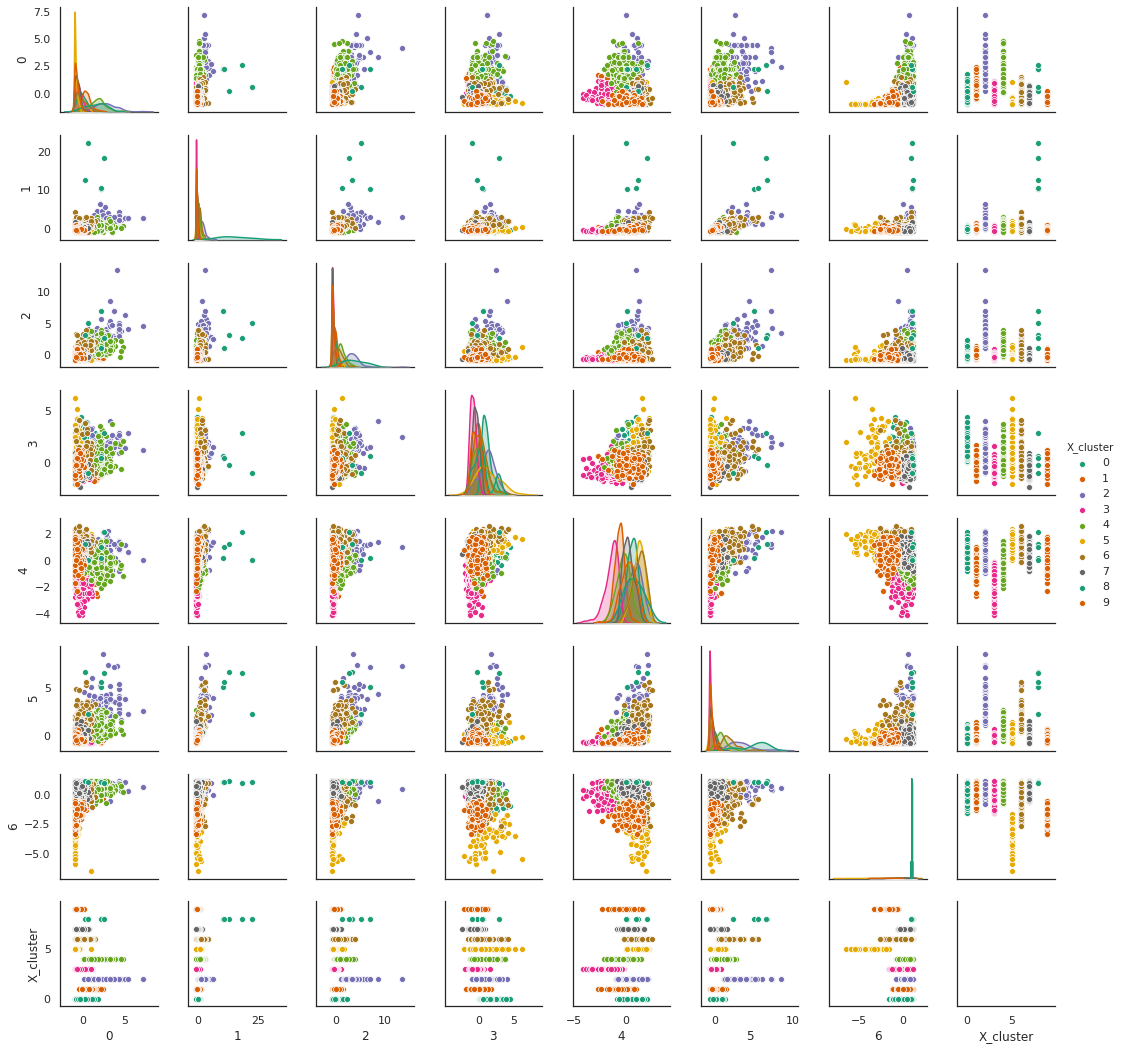

In [75]:
df= DataFrame(X_train)
df['X_cluster'] = X_clustered
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

### [PCA] 2 - dimensions

Попробуем упростить задачу алгоритму и воспользуемся сокращением размерности.
Для этого выбран алгоритм PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rating)

Text(0.5, 1.0, 'Projection our points on 2 components after PCA')

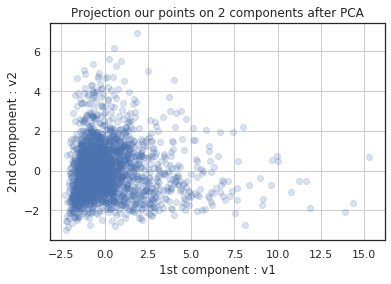

In [77]:
plt.scatter(X_pca[:,0], X_pca[:,1], alpha = .2)

plt.grid()
plt.xlabel('1st component : v1')
plt.ylabel('2nd component : v2')
plt.title('Projection our points on 2 components after PCA')

In [78]:
kmeans.labels_

array([6, 7, 1, ..., 7, 0, 6], dtype=int32)

In [79]:
kmeans.cluster_centers_

array([[-4.03853478e-02, -1.06415864e-01, -1.23731822e-01,
         1.24255069e+00,  7.12791456e-01, -1.76658799e-01,
         6.77794549e-03],
       [ 4.97984559e-01, -1.35812793e-01,  1.18129096e-02,
        -1.37145873e-01, -5.43431095e-01, -2.31617426e-01,
         2.00724912e-01],
       [ 2.82017312e+00,  2.09670759e+00,  3.57112064e+00,
         1.29661516e+00,  8.47131194e-01,  3.34385987e+00,
         6.25846536e-01],
       [-3.73648734e-01, -4.36856019e-01, -4.44668411e-01,
        -7.60717258e-01, -1.31853435e+00, -5.33487569e-01,
         2.58225508e-01],
       [ 1.97506106e+00,  6.05342919e-01,  1.33915387e+00,
         2.97196522e-01, -1.49335775e-01,  8.43991944e-01,
         5.04654359e-01],
       [-8.06178241e-01, -5.78064353e-02, -3.60214911e-01,
         1.35877961e+00,  1.31988339e+00, -2.50409094e-01,
        -3.47094109e+00],
       [-1.52612199e-01,  1.16561768e+00,  6.52597192e-01,
         4.89427338e-01,  1.37277916e+00,  1.89720584e+00,
        -1.0358611

In [0]:
X_clust_2dim = kmeans.fit_predict(X_pca)

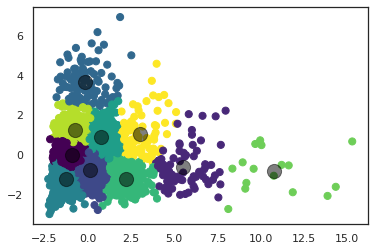

In [81]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


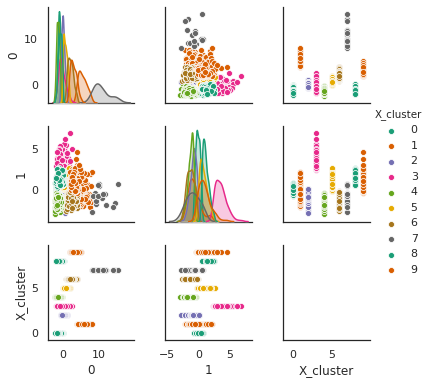

In [82]:
df= DataFrame(X_pca)
df['X_cluster'] = X_clust_2dim
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

Получили весьма неполохую кластеризацию, с четко сформированными кластерами, что говорит о том, что с подобными данными можно работать в сокращенной размерности

## [PCA] KNN

попробуем применить KNN после сокращения размерности

In [83]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y_rating, test_size = 0.1, random_state = 42)

N_train, _ = X_train_pca.shape 
N_test,  _ = X_test_pca.shape 

print(N_train, N_test)

2439 271


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_pca, Y_train_pca)

err_train = np.mean(Y_train != knn.predict(X_train_pca))
err_test  = np.mean(Y_test  != knn.predict(X_test_pca))

print("Train loss: " + str(err_train)) 
print("Test loss: " + str(err_test))

Train loss: 0.37802378023780236
Test loss: 0.5571955719557196


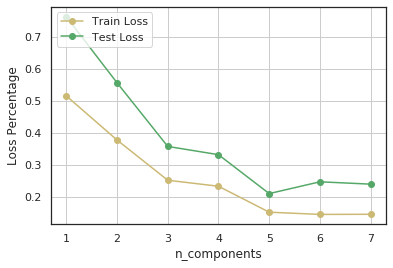

In [85]:
err_train_list = []
err_test_list = []
for n_dim in range(1,8):
    pca = PCA(n_components = n_dim)
    X_PCA = pca.fit_transform(X_rating)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y_rating, test_size = 0.1, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
    err_train_list.append(np.mean(knn.predict(X_train) != y_train))
    err_test_list.append(np.mean(knn.predict(X_test) != y_test))
plt.grid()
plt.plot(range(1,8), err_train_list, 'y-o', label = 'Train Loss')
plt.plot(range(1,8), err_test_list,  'g-o', label = 'Test Loss')  
plt.xlabel('n_components')
plt.ylabel('Loss Percentage')
plt.legend(loc = 2)

The loss value does not change for more than 2 components. It's because for this case this train data on which PCA was trained is already simpe for training models.
But, generally speaking, for multidimentional data with high complexity we will watch that train loss could be high.

Значение ошибки не сильно меняется для более чем 5 компонент. Это говорит о том, что в данном случае тренировочне данные на которых PCA был обучени уже изначально просты длч тренировочных моделец.

Но вообще говоря, для мультиразмерных данных с большой структурной сложностью тренировочная ошибка так же будет весьма невысока

---


# **PART 3**
# **Data Researching Eductions**


---

Neural Net

In [0]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [87]:
mlp_model = MLPClassifier(hidden_layer_sizes = (2,4), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, Y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Train error: {}, Test error: {}'.format(np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)))

Train error: 0.1000410004100041, Test error: 0.12915129151291513


In [88]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Train error: {}, Test error: {}'.format(np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)))

Train error: 0.1000410004100041, Test error: 0.12915129151291513


Благодаря обучению сети мы получили наилучшиц результат

### Alpha Hyperparameter Selection 

Что если найти налучший сет параметров?

In [0]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (2, 4), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, Y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))

### Error vs. Alpha

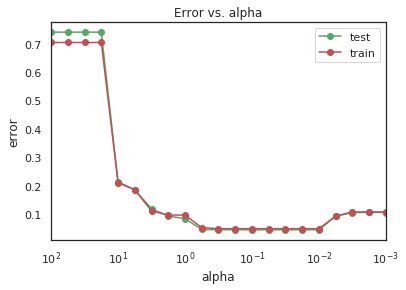

In [90]:
plt.semilogx(alpha_arr, train_err, 'g-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

### Model with optimal alpha

In [91]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.043870438704387046, 	Min test error: 0.04797047970479705
Alpha:  0.01


In [92]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2, 4),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, Y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)))

Train error: 0.043870438704387046, Test error: 0.04797047970479705


Вау! Даже нет ошибок на тестовых данных, отличных от тренировочной выборки, да и какое значение ошибок классификации

### Neron number Selection

In [0]:
neurons_arr = np.arange(2,20, 1)
test_err = []
train_err = []
neurons = []
for neuron_1_layer in neurons_arr:
    for neuron_2_layer in neurons_arr:
        mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_1_layer, neuron_2_layer), 
                                  solver = 'lbfgs', activation = 'logistic', random_state = 42)
        mlp_model.fit(X_train, Y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        neurons.append('{}X{}'.format(neuron_1_layer, neuron_2_layer))
        train_err.append(np.mean(Y_train != y_train_pred))
        test_err.append(np.mean(Y_test != y_test_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  """Entry point for launching an IPython kernel.


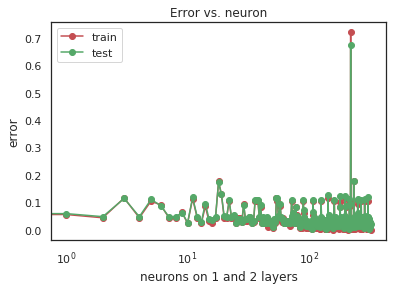

In [94]:
plt.semilogx(neurons, train_err, 'r-o', label = 'train')
plt.semilogx(neurons, test_err, 'g-o', label = 'test')
plt.title('Error vs. neuron')
plt.xlabel('neurons on 1 and 2 layers')
plt.ylabel('error')
plt.legend()
pass

Видим, что в зависимости от числа нейронов ошибка может менятся, и при этом появляются выбросы.

Здесь нельзя однозначно сказать можем ли мы увеличивать число нейронов, потому что их большое число может "запутать" модель на весьма комплексных данных, а на простых быстро достигнуть переобучения или застревать в локальных минимумах

### Model with optimal neurons value

Попробуем вычислить оптимальное число нейронов на слоях, вычисля выходную ошибку сети с слоев

In [95]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

index = np.where(test_err == min_test_err)[0][0]

neuron_opt = neurons[index]
neuron_opt

'7X19'

Получили оптимальное число нейронов на первом и втором слое

In [0]:
neuron_opt_1 = 7
neuron_opt_2 = 19

### With Optimal Hyperparameters

Вау! результат кажется отличным, и даже на тестовых данных мы показывем минимальную ошибку 

In [102]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1, neuron_opt_2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, Y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(Y_train != y_train_pred), np.mean(Y_test != y_test_pred)))

Train error: 0.002870028700287003, Test error: 0.0036900369003690036


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

estiamtors = np.arange(100, 3000, 100)
test_err = []
train_err = []
oob_score = []
for estimator in estiamtors:
    rf = RandomForestClassifier(n_estimators = estimator, random_state = 42, oob_score=True)
    rf.fit(X_train, Y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    oob_score.append(rf.oob_score_)

Результат почти никак не поменялся в зависимости от изменения гиперпараметров

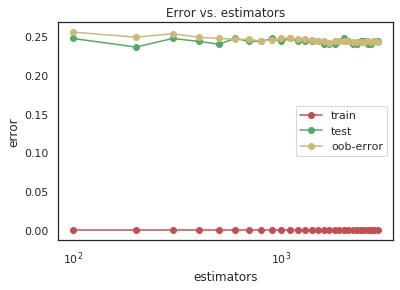

In [111]:
plt.semilogx(estiamtors, train_err, 'r-o', label = 'train')
plt.semilogx(estiamtors, test_err, 'g-o', label = 'test')
plt.semilogx(estiamtors, np.ones(len(oob_score))-oob_score, 'y-o', label = 'oob-error')
plt.title('Error vs. estimators')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass

In [0]:
from sklearn import ensemble
import numpy as np

In [113]:
gbt = ensemble.GradientBoostingClassifier()
gbt.fit(X_train, Y_train)

err_train = np.mean(Y_train != gbt.predict(X_train))
err_test = np.mean(Y_test != gbt.predict(X_test))

print('err_train: ', err_train, '\nerr_test : ', err_test)

err_train:  0.02132021320213202 
err_test :  0.2878228782287823


In [0]:
counter = np.arange(5, 1000 , 100)

test_err = []
train_err = []

for c in counter:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = c)
    gbt.fit(X_train, Y_train)
    train_err.append(np.mean(Y_train != gbt.predict(X_train)))
    test_err.append(np.mean(Y_test  != gbt.predict(X_test)))

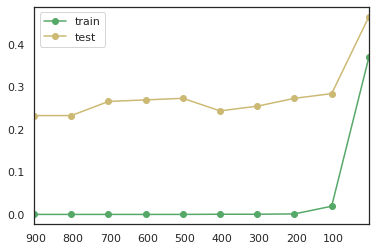

In [115]:
plt.xlim([np.max(counter), np.min(counter)])
plt.plot(counter, train_err, 'g-o', label = 'train')
plt.plot(counter, test_err,  'y-o', label = 'test')
plt.legend(loc = 2)

In [116]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.23247232472324722


Мы получили достаточно сведений о наших данных, применяя базовые инструменты статистики, визуализации признаков, корреляции.

Благодаря чему стало понятно каким образом можно данные "улучшить", избавится от выбросов, пустых полей, изменить структуру данных хранимых в ряде признаков, стандартизируя их и получая возможность обучать на них модели.

С помощью алгоритмов обучения с учителем и без, можно понять структуру как многомерных, так и даных с пониженой рамерностью (кластеризация), получить алгоритмы готовые классифицировать даннные, на основе тренировочной выборки.

В разделе 3, получилось, что сеть показывает себя лучше всего, а ансамбли не дают однозначного и ожидаемого результата. В каждом из обоих случаев, результат нужно граммотно проанализировать, дабы убедится, что мы не наблюдаем переобучения, или наоборот неверно настроили модель, получая неопределенные дрезультаты обучения.